In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,81.0,83.654321,58.104251,1.0,26.0,87.0,130.0,206.0
Number,81.0,4.049383,1.619423,2.0,3.0,4.0,5.0,10.0
Start,81.0,11.493827,4.883962,1.0,9.0,13.0,16.0,18.0


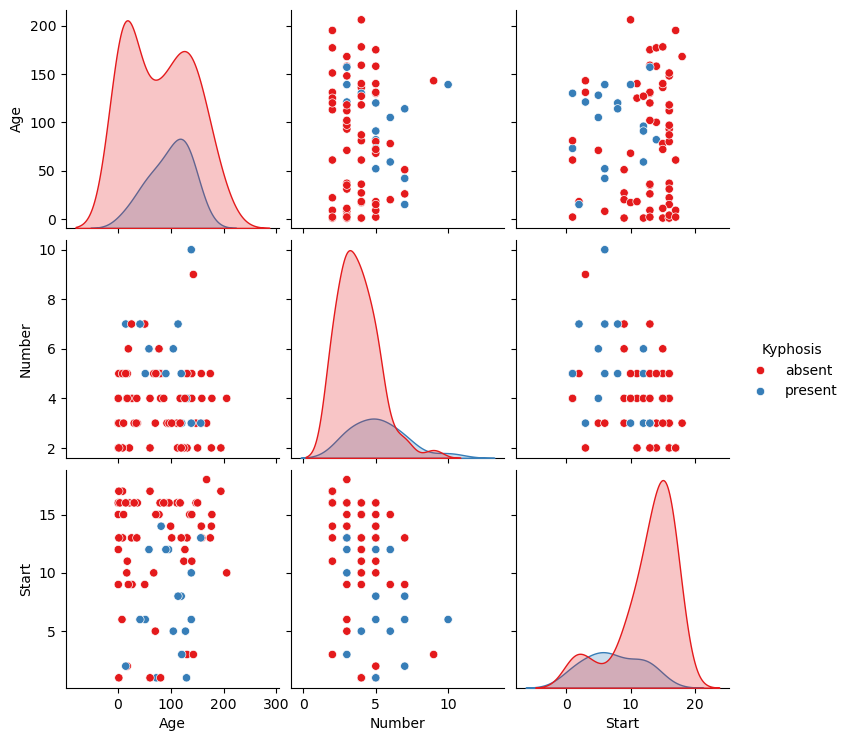

In [6]:
sns.pairplot(data=df, hue='Kyphosis', palette='Set1');

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
predictions = dtree.predict(X_test)

In [14]:
from sklearn.metrics import classification_report

In [15]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.68      0.76      0.72        17
     present       0.33      0.25      0.29         8

    accuracy                           0.60        25
   macro avg       0.51      0.51      0.50        25
weighted avg       0.57      0.60      0.58        25



In [16]:
from sklearn.tree import plot_tree

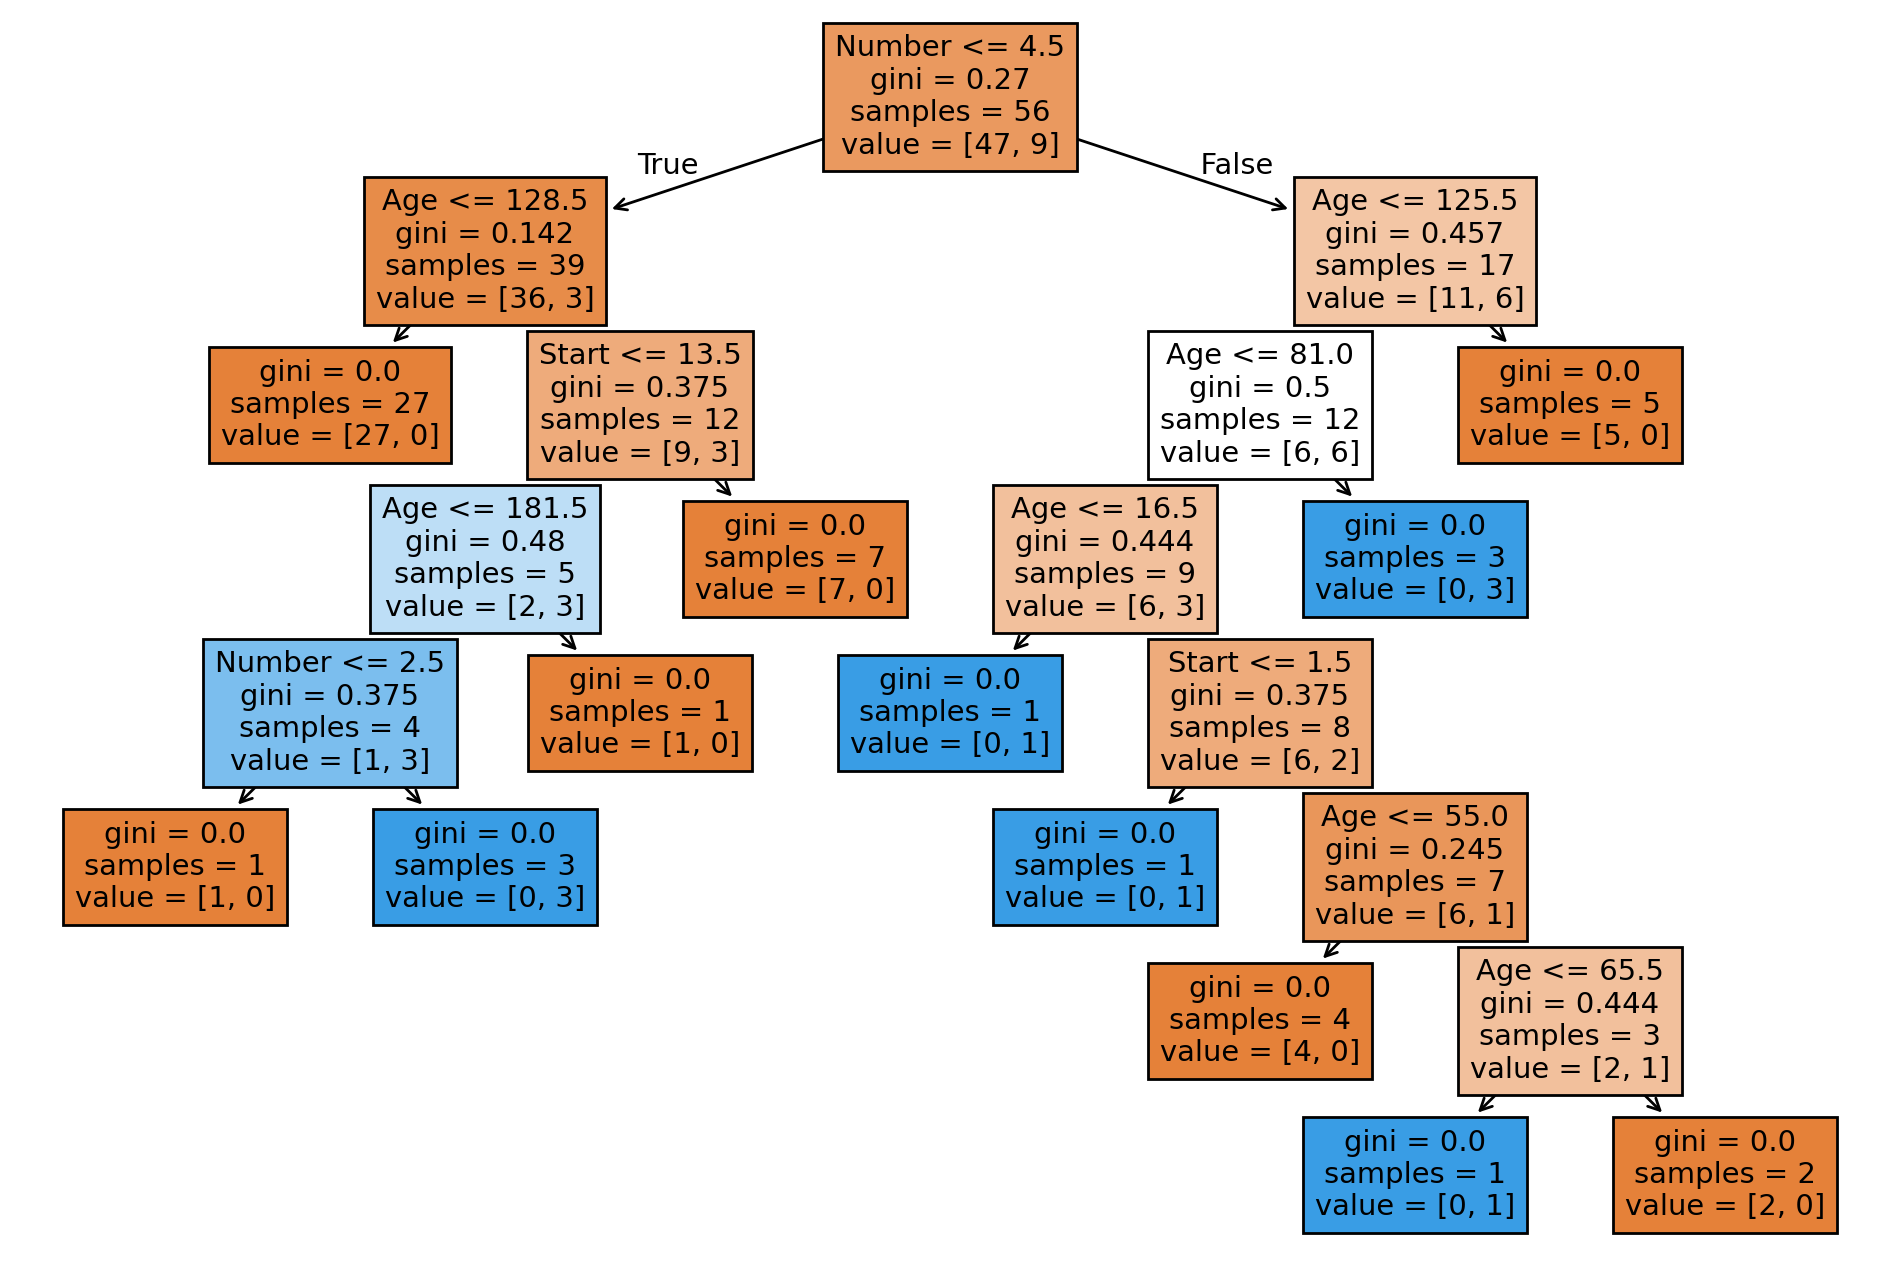

In [17]:
plt.figure(figsize=(12,8), dpi=200)
plot_tree(dtree, feature_names=X_train.columns, filled=True);